In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from abtem import *
from ase.io import read
from ase import Atoms

# STEM-simulations with PRISM

## The scattering matrix

In abTEM, you build a scattering matrix using the `SMatrixBuilder` object. This requires two parameters that are quite different from STEM with the normal multislice method. 

The `expansion_cutoff`, which corresponds to the maximum scattering angle computed for the S-Matrix, this value should be set slightly larger than the probe semiangle cutoff, which we will set later.

Setting the interpolation factor to one, the PRISM algorithm converges to the normal multislice method. Increasing this factor decreases the accuracy of PRISM, however, the tradeoff can be very favorable. More on how to choose this later.

We also set the extent and sampling, however, these would typically be chosen automatically by pairing the scattering matrix with a potential.

You do not have to set parameters such as defocus at this point, this may in fact be done after the multislice part of the PRISM algorithm.

In [3]:
S_builder = SMatrixBuilder(expansion_cutoff=22, interpolation=1, energy=80e3, extent=10, sampling=.02)

S = S_builder.build()

The plane expansion can be obtained as an array, `S.array`. The plane wave are indexed by the first dimension, each corresponding to a 2d wave vector given a `S.k`.

In [5]:
S.array.shape, S.k.shape

((89, 500, 500), (89, 2))

The scattering matrix has a contrast transfer function, which will determine the imaging parameters of the represented probes.

In [7]:
S.ctf.semiangle_cutoff = 20
S.ctf.defocus = 50

To obtain a probe wave function, we have to sum up the expansion, given a particular position. This can be done with `.collapse` method.

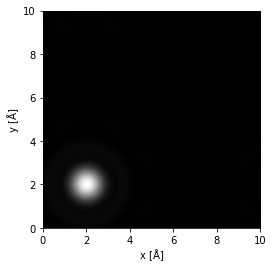

In [9]:
probes = S.collapse(positions=[(2,2),(5,5)])

probes[0].show()

## STEM simulations

In [13]:
atoms = read('data/orthogonal_graphene.cif') 

potential = Potential(atoms, sampling=.03)

In [14]:
S_builder = SMatrixBuilder(expansion_cutoff=32, interpolation=1, energy=80e3)

In [19]:
S = S_builder.multislice(potential)

In [29]:
S.ctf.semiangle_cutoff = 30
S.ctf.defocus = 50
S.ctf.focal_spread = 60

In [30]:
detector = AnnularDetector(inner=86, outer=190)

gridscan = GridScan(start=[0, 0], end=[np.sqrt(3) * 1.42, 3 * 1.42], sampling=.2)

In [31]:
measurements = S.scan(gridscan, [detector])

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x13ffbb400>)

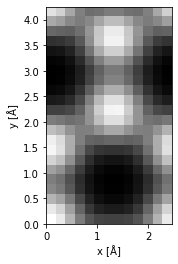

In [32]:
measurements[detector].show()

## The interpolation factor

To be filled in soon.

## Using PRISM with memory-constraints

To be filled in soon.